In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/MachineLearning/wdbc.dataset.csv', header = None) # The path of the file is subjectto change
data = data.reindex(np.random.permutation(data.index))
#print(data)
x = data.iloc[:,2:len(data.columns)]
#print(x.mean())

x = ((x - x.mean())/(x.std())).to_numpy()
#print(type(x))
np.set_printoptions(suppress='True')
#print(x, "", x.shape) 

In [3]:
addones = np.ones(len(x))
addones = addones.reshape(len(addones),1)

In [4]:
x = np.append(x,addones, axis = 1)
x[:,[0,x.shape[1]-1]] = x[:,[x.shape[1]-1,0]]
#print(x)
training_x = x[0:int(0.8*x.shape[0]),:]


In [5]:
data = data.values
y = np.array(data[:,1])
#print(np.sum(y)/y.shape[0])
for i in range(len(y)):
    if y[i] == 'M':
       y[i] = 1
    elif y[i] == 'B':
       y[i] = 0

In [6]:
#np.sum(y)/y.shape[0] # Testing the percentage of positive test cases

In [7]:
training_y = y[0:int(0.8*y.shape[0])]
training_y = training_y.reshape(1,len(training_y))
#print(training_y.shape)
#print(training_y)

In [8]:
# Extracting the rest of the data
rem_x = x[int(0.8*x.shape[0])+1:x.shape[0],:] 
#print(rem_x.shape)
rem_y = y[int(0.8*y.shape[0])+1:y.shape[0]] 
#rem_y = test_y.reshape(1,len(test_y))
#print(rem_y.shape)
#Extracting  the validation and test set
validation_x = rem_x[0:int(rem_x.shape[0]*0.5),:]
test_x = rem_x[int(rem_x.shape[0]*0.5)+1:rem_x.shape[0],:]
validation_y = rem_y[0:int(rem_y.shape[0]*0.5)]
test_y = rem_y[int(rem_y.shape[0]*0.5)+1:rem_y.shape[0]]
validation_y = validation_y.reshape(1,len(validation_y))
test_y = test_y.reshape(1,len(test_y))
#print(validation_y.shape)
#print(test_y.shape)
#logistic_regression(training_x,training_y)

In [9]:
def sigmoid(z):
    sig = 1.0 / (1.0 + np.exp(-z))     # Define sigmoid function
    #print(sig)
    return sig
    

In [23]:
def logistic_regression(training_x, training_y,validation_x,validation_y, test_x, test_y,epochs):
    w = np.random.randn(training_x.T.shape[0])
    w = w.reshape(training_x.T.shape[0],1)
    #print(w,"",w.shape)
    
    m_train = training_y.shape[1]
    #np_ones_train = np.ones(m_train).reshape(1,m_train)
    m_valid = validation_y.shape[1]
    #np.ones_valid = np.ones(m_valid).reshape(1,m_valid)
    #print(m)  
    '''y_pred = sigmoid(np.array(np.dot(w.T,training_x.T),dtype = np.float64))
    print(y_pred)
    '''
    #test = np.dot((y_pred - training_y),training_x))/m
    #print(test)
    #print(np.sum(np.dot(p,training_x)))
    #print(np.dot(w.T,training_x.T).shape)
    #training_costs=[]
    #validation_costs=[]
    training_cost_sum = 0
    validation_cost_sum = 0
    for i in range(epochs):
        h_x = sigmoid(np.array(np.dot(w.T,training_x.T),dtype = np.float64))
        #print(h_x)
        #p1 = h_x - training_y
        #p2 = 1-h_x
        
        cost_training = -(np.dot(h_x,training_y.T)+np.dot((1-h_x),(1-training_y).T)).item()/m_train
        training_cost_sum += cost_training
        w = w - ((0.01*np.dot(training_x.T,(h_x-training_y).T)*(1/m_train))) 
    
        #print(p)
        h_x_val = sigmoid(np.array(np.dot(w.T,validation_x.T),dtype=np.float64))
        cost_validation = -(np.dot(h_x_val,validation_y.T)+np.dot((1-h_x_val),(1-validation_y).T)).item()/m_valid
        validation_cost_sum += cost_validation
        w = w - ((0.01*np.dot(validation_x.T,(h_x_val-validation_y).T)*(1/m_valid)))
    training_cost_average = training_cost_sum / epochs
    validation_cost_average = validation_cost_sum / epochs

    y_pred = sigmoid(np.array(np.dot(w.T,test_x.T),dtype=np.float64))
    #print(y_pred)
    for j in range(y_pred.shape[0]):
        for i in range(y_pred.shape[1]):
            if y_pred[j,i] >= 0.5:
                y_pred[j,i] = 1
            else:
                y_pred[j,i] = 0


    print(y_pred.astype(int),"",y_pred.shape)
    print(test_y,"",test_y.shape)
    print(w.shape)  
    TP,TN = 0,0
    FP,FN = 0,0
    y_pred = y_pred.astype(int)
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i,j] == 1 and test_y[i,j] == 1:
                TP = TP+1
            elif y_pred[i,j] == 0 and test_y[i,j] == 0:
                TN = TN+1
            elif y_pred[i,j] == 0 and test_y[i,j] == 1:
                FN = FN+1
            elif y_pred[i,j] == 1 and test_y[i,j] == 0:
                FP = FP+1
    accuracy = ((TN+TP) / (TN+TP+FN+FP))*100
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    print("accuracy" , accuracy)
    print("precision", precision)
    print("recall", recall)
    return accuracy, training_cost_average, validation_cost_average



In [24]:
accuracy_list = []
training_cost_list = []
validation_cost_list = []
epochs = np.array([500,1000,1500,2000,2500,3000,3500])
for k in range(epochs.size):
    values = logistic_regression(training_x,training_y,validation_x,validation_y,test_x,test_y,epochs[k])
    accuracy_list.append(values[0])
    training_cost_list.append(values[1])
    validation_cost_list.append(values[2])
print(accuracy_list)
print(training_cost_list)
print(validation_cost_list)

[[1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0]]  (1, 56)
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0]]  (1, 56)
(31, 1)
accuracy 91.07142857142857
precision 0.8846153846153846
recall 0.92
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0]]  (1, 56)
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0]]  (1, 56)
(31, 1)
accuracy 96.42857142857143
precision 0.96
recall 0.96
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0]]  (1, 56)
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
  0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0]]  (1, 56)
(31, 1)
accuracy 96.42857142857143
precision 0.96
recall 0.96
[[0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 

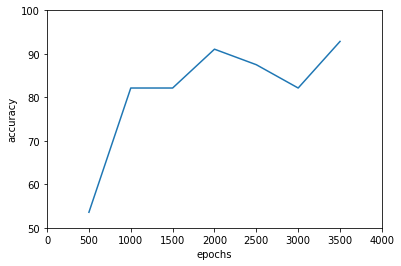

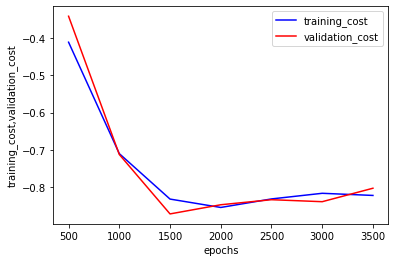

In [22]:
plt.plot(epochs,accuracy_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.axis([0,4000,50,100])
plt.show()
plt.plot(epochs,training_cost_list,label="training_cost",color='b')
plt.plot(epochs,validation_cost_list,label="validation_cost",color='r')
plt.xlabel('epochs')
plt.ylabel('training_cost,validation_cost')
plt.legend()
plt.show()